### Importação dos dados



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Primeiramente, executaremos um código para calcular o faturamento bruto de cada loja. Em seguida, desenvolveremos um código para visualizar, por meio de um gráfico de barras, as diferenças nos faturamentos entre as lojas, e concluiremos com uma análise descritiva dos dados.

In [ ]:
# Cálculo do faturamento total por loja
faturamento_lojas = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

# Exibição dos resultados
for loja_nome, valor in faturamento_lojas.items():
    print(f"Faturamento Total {loja_nome}: R$ {valor:,.2f}")


Faturamento Total Loja 1: R$ 1,534,509.12
Faturamento Total Loja 2: R$ 1,488,459.06
Faturamento Total Loja 3: R$ 1,464,025.03
Faturamento Total Loja 4: R$ 1,384,497.58


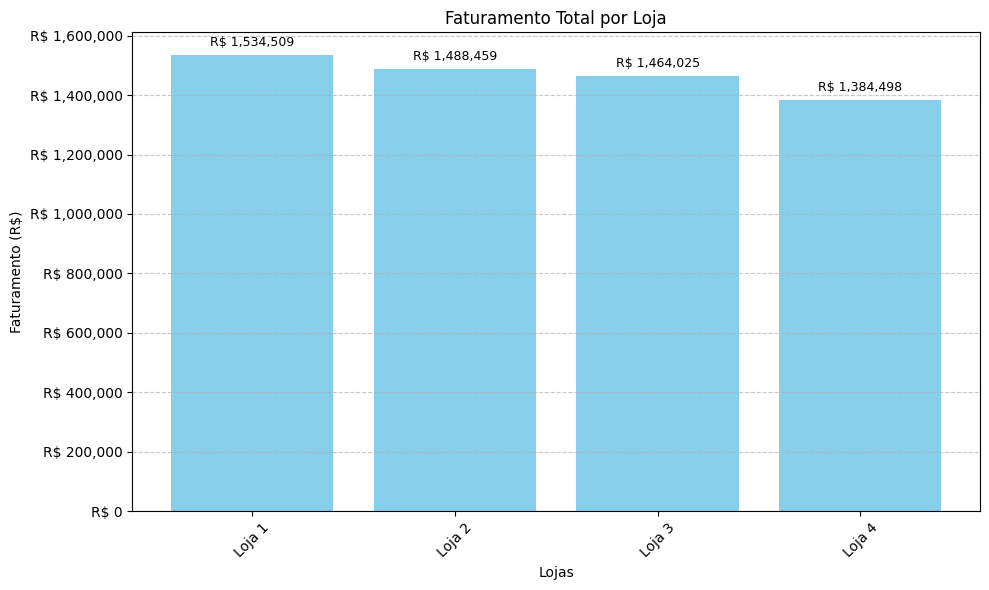

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(faturamento_lojas.keys(), faturamento_lojas.values(), color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatar o eixo Y com separador de milhar
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'))

# Adicionar os valores nos topos das barras
for i, valor in enumerate(faturamento_lojas.values()):
    plt.text(i, valor + 20000, f"R$ {valor:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

##Análise Descritiva
A comparação inicial dos faturamentos mostra uma redução gradativa nas receitas das lojas, com a Loja 1 apresentando o maior resultado e a Loja 4 o menor. A diferença de cerca de R$ 150 mil entre ambas pode ser um indicativo de menor eficiência ou desempenho da Loja 4, tornando-a uma potencial candidata à venda, caso outros indicadores confirmem essa tendência.

# 2. Vendas por Categoria


In [37]:
# Função para contar vendas por categoria
def vendas_por_categoria(df, nome_loja):
    contagem = df['Categoria do Produto'].value_counts()
    print(f"\nCategorias mais vendidas - {nome_loja}:\n")
    print(contagem)
    return contagem

# Aplicando para cada loja
categorias_loja1 = vendas_por_categoria(loja, 'Loja 1')
categorias_loja2 = vendas_por_categoria(loja2, 'Loja 2')
categorias_loja3 = vendas_por_categoria(loja3, 'Loja 3')
categorias_loja4 = vendas_por_categoria(loja4, 'Loja 4')



Categorias mais vendidas - Loja 1:

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Categorias mais vendidas - Loja 2:

Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Categorias mais vendidas - Loja 3:

Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Categorias mais vendidas - Loja 4:

Categoria do Pr

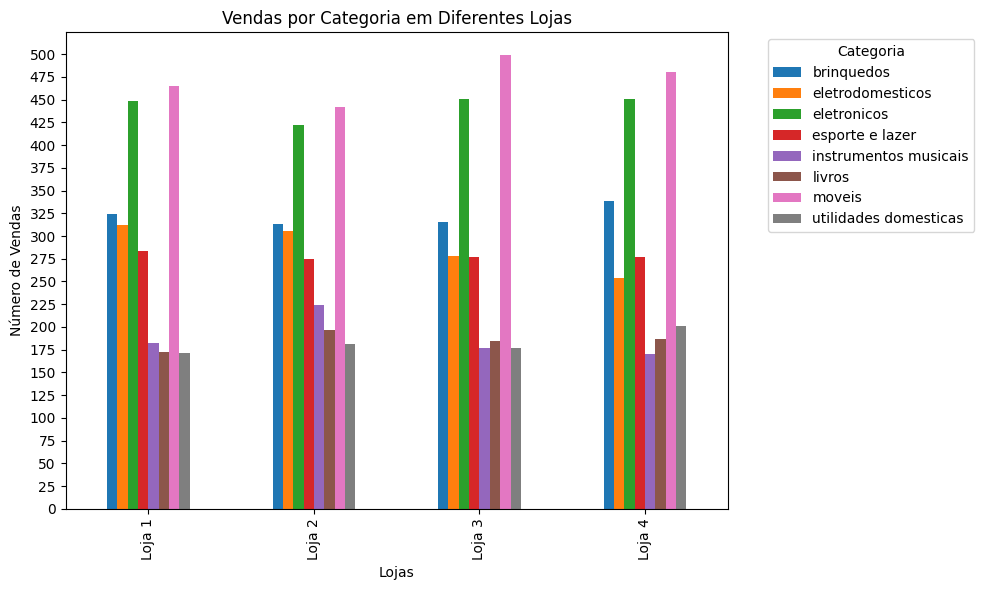

In [38]:
# Função para contar vendas por categoria
def vendas_por_categoria(df, nome_loja):
    contagem = df['Categoria do Produto'].value_counts()
    return contagem

# Aplicando para cada loja
categorias_loja1 = vendas_por_categoria(loja, 'Loja 1')
categorias_loja2 = vendas_por_categoria(loja2, 'Loja 2')
categorias_loja3 = vendas_por_categoria(loja3, 'Loja 3')
categorias_loja4 = vendas_por_categoria(loja4, 'Loja 4')

# Concatenando e transpondo os dados
df_categorias = pd.DataFrame({
    'Loja 1': categorias_loja1,
    'Loja 2': categorias_loja2,
    'Loja 3': categorias_loja3,
    'Loja 4': categorias_loja4
}).fillna(0).T

# Plotando
ax = df_categorias.plot(kind='bar', figsize=(10, 6))
plt.title('Vendas por Categoria em Diferentes Lojas')
plt.xlabel('Lojas')
plt.ylabel('Número de Vendas')

# Ajustando ticks do eixo Y
max_y = df_categorias.values.max()
step = 25
yticks = np.arange(0, max_y + step, step)
plt.yticks(yticks)

# Ajustando a legenda
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout final
plt.tight_layout()
plt.show()




##Análise Descritiva
Com base nos dados, foi possível identificar que os três produtos mais vendidos em todas as lojas são móveis, eletrônicos e brinquedos, nessa ordem. Curiosamente, elas também compartilham os três produtos menos vendidos — utilidades domésticas, livros e instrumentos musicais — embora a ordem desses itens varie entre as lojas.

Um ponto interessante é que a Loja 1 não lidera em vendas de nenhum dos três produtos mais vendidos no comparativo entre lojas. Isso sugere que a diferença de faturamento entre elas pode ser mais bem explicada por meio de uma análise ABC dos produtos comercializados, levando em consideração não apenas a quantidade vendida, mas também o valor agregado de cada item.

Abaixo, listamos os três produtos mais vendidos por loja. Os que lideram em vendas entre todas as lojas estão marcados com um asterisco:

### Loja 1:
1. Moveis (465 unidades)
2. Eletrônicos (448 unidades)
3. Brinquedos (324 unidades)

### Loja 2:
1. Moveis (442 unidades)
2. Eletrônicos (422 unidades)
3. Brinquedos (313 unidades)

### Loja 3:
1. Moveis (499 unidades)*
2. Eletrônicos (451 unidades)*
3. Brinquedos (315 unidades)

### Loja 4:
1. Moveis (480 unidades)
2. Eletrônicos (451 unidades)*
3. Brinquedos (338 unidades)*

# 3. Média de Avaliação das Lojas

In [35]:
# Função para calcular a média das avaliações
def media_avaliacao(df, nome_loja):
    media = df['Avaliação da compra'].mean()
    print(f"{nome_loja}: média de avaliação = {media:.2f}")
    return media

# Cálculo da média de avaliação por loja
media_loja1 = media_avaliacao(loja, 'Loja 1')
media_loja2 = media_avaliacao(loja2, 'Loja 2')
media_loja3 = media_avaliacao(loja3, 'Loja 3')
media_loja4 = media_avaliacao(loja4, 'Loja 4')


Loja 1: média de avaliação = 3.98
Loja 2: média de avaliação = 4.04
Loja 3: média de avaliação = 4.05
Loja 4: média de avaliação = 4.00


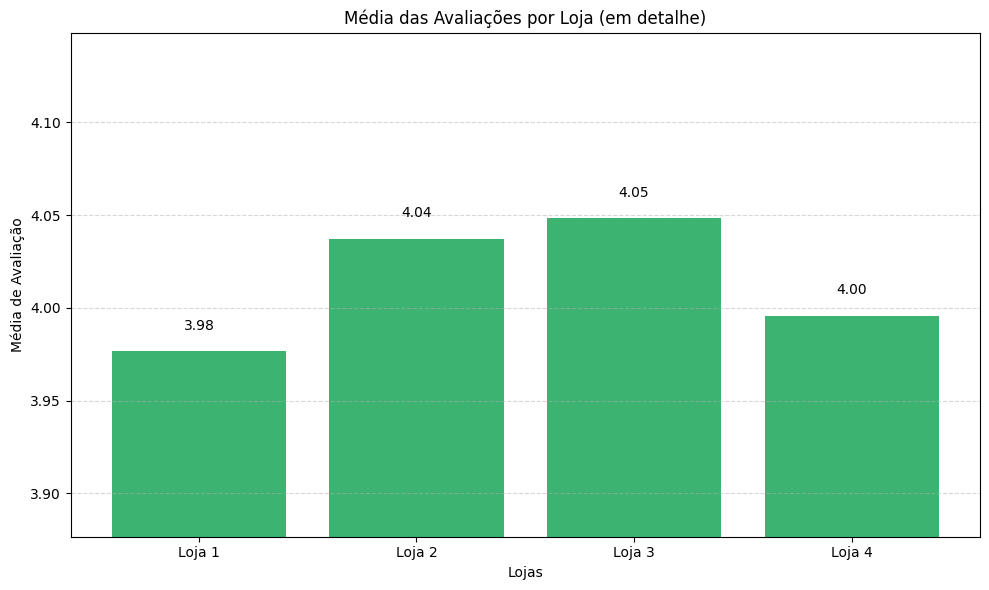

In [36]:
# Dicionário com as médias calculadas
medias_avaliacoes = {
    'Loja 1': media_loja1,
    'Loja 2': media_loja2,
    'Loja 3': media_loja3,
    'Loja 4': media_loja4
}

# Dados para o gráfico
nomes_lojas = list(medias_avaliacoes.keys())
valores_medias = list(medias_avaliacoes.values())

# Zoom no eixo Y
limite_inferior = min(valores_medias) - 0.1
limite_superior = max(valores_medias) + 0.1

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(nomes_lojas, valores_medias, color='mediumseagreen')
plt.title('Média das Avaliações por Loja (em detalhe)')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.ylim(limite_inferior, limite_superior)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar os valores no topo das barras
for i, valor in enumerate(valores_medias):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


##Análise Descritiva
As médias de avaliação das lojas revelam que a Loja 1, apesar de apresentar o maior faturamento, possui o menor índice de avaliação entre elas. A diferença, no entanto, é pequena: apenas 0,07 ponto abaixo da melhor média, registrada pela Loja 3, que se destaca como a maior vendedora de móveis e eletrônicos.

# 4. Produtos Mais e Menos Vendidos

In [31]:
# Função para identificar o(s) produto(s) mais e menos vendido(s)
def produto_mais_menos_vendido(df, nome_loja):
    contagem_produtos = df['Produto'].value_counts()

    max_vendas = contagem_produtos.max()
    min_vendas = contagem_produtos.min()

    mais_vendidos = contagem_produtos[contagem_produtos == max_vendas].index.tolist()
    menos_vendidos = contagem_produtos[contagem_produtos == min_vendas].index.tolist()

    print(f"\n📊 {nome_loja}")
    print(f"➡ Produto(s) mais vendido(s):")
    for prod in mais_vendidos:
        print(f"   - {prod} ({max_vendas} vendas)")

    print(f"⬅ Produto(s) menos vendido(s):")
    for prod in menos_vendidos:
        print(f"   - {prod} ({min_vendas} venda{'s' if min_vendas > 1 else ''})")

    return mais_vendidos, menos_vendidos

# Aplicar função para exibir os produtos
mv1, lv1 = produto_mais_menos_vendido(loja, 'Loja 1')
mv2, lv2 = produto_mais_menos_vendido(loja2, 'Loja 2')
mv3, lv3 = produto_mais_menos_vendido(loja3, 'Loja 3')
mv4, lv4 = produto_mais_menos_vendido(loja4, 'Loja 4')



📊 Loja 1
➡ Produto(s) mais vendido(s):
   - Micro-ondas (60 vendas)
   - TV Led UHD 4K (60 vendas)
   - Guarda roupas (60 vendas)
⬅ Produto(s) menos vendido(s):
   - Headset (33 vendas)
   - Celular ABXY (33 vendas)

📊 Loja 2
➡ Produto(s) mais vendido(s):
   - Iniciando em programação (65 vendas)
⬅ Produto(s) menos vendido(s):
   - Jogo de tabuleiro (32 vendas)

📊 Loja 3
➡ Produto(s) mais vendido(s):
   - Kit banquetas (57 vendas)
⬅ Produto(s) menos vendido(s):
   - Blocos de montar (35 vendas)

📊 Loja 4
➡ Produto(s) mais vendido(s):
   - Cama box (62 vendas)
⬅ Produto(s) menos vendido(s):
   - Guitarra (33 vendas)


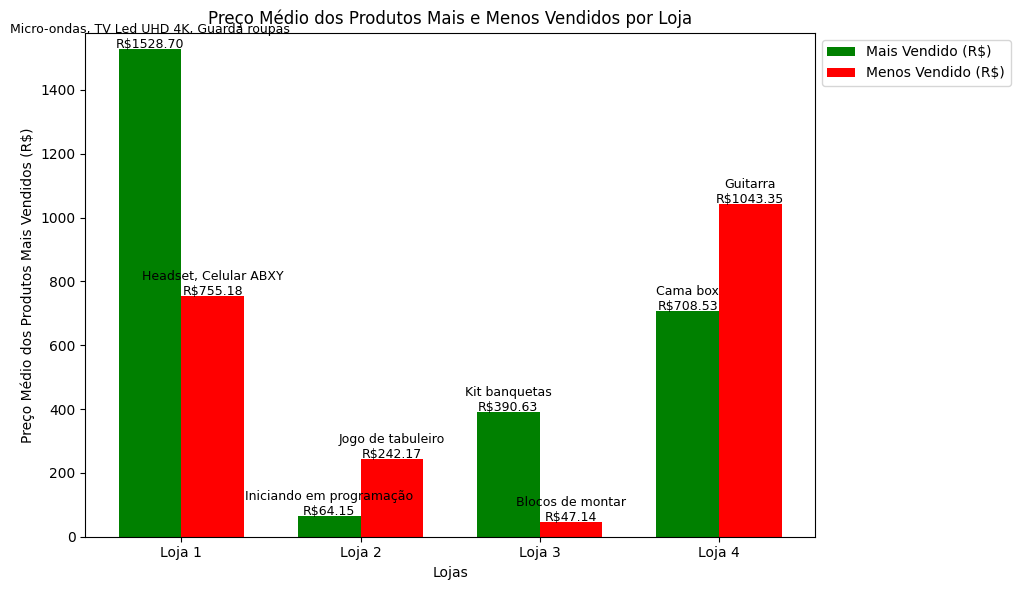

In [32]:
# Função para calcular o preço médio dos produtos mais e menos vendidos
def preco_medio_produtos(df, produtos):
    return np.mean(df[df['Produto'].isin(produtos)]['Preço'])

# Preço médio dos mais vendidos
preco_mv1 = preco_medio_produtos(loja, mv1)
preco_mv2 = preco_medio_produtos(loja2, mv2)
preco_mv3 = preco_medio_produtos(loja3, mv3)
preco_mv4 = preco_medio_produtos(loja4, mv4)

# Preço médio dos menos vendidos
preco_lv1 = preco_medio_produtos(loja, lv1)
preco_lv2 = preco_medio_produtos(loja2, lv2)
preco_lv3 = preco_medio_produtos(loja3, lv3)
preco_lv4 = preco_medio_produtos(loja4, lv4)

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
mais_vendidos_preco = [preco_mv1, preco_mv2, preco_mv3, preco_mv4]
menos_vendidos_preco = [preco_lv1, preco_lv2, preco_lv3, preco_lv4]
nomes_mais_vendidos = [mv1, mv2, mv3, mv4]
nomes_menos_vendidos = [lv1, lv2, lv3, lv4]

x = np.arange(len(lojas))
largura = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
barras1 = ax.bar(x - largura/2, mais_vendidos_preco, largura, label='Mais Vendido (R$)', color='green')
barras2 = ax.bar(x + largura/2, menos_vendidos_preco, largura, label='Menos Vendido (R$)', color='red')

# Rótulos
ax.set_xlabel('Lojas')
ax.set_ylabel('Preço Médio dos Produtos Mais Vendidos (R$)')
ax.set_title('Preço Médio dos Produtos Mais e Menos Vendidos por Loja')
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Nome e valor dos produtos
for i in range(len(lojas)):
    nome_mais = ', '.join(nomes_mais_vendidos[i])
    nome_menos = ', '.join(nomes_menos_vendidos[i])

    ax.text(x[i] - largura/2, mais_vendidos_preco[i] + 3,
            f"{nome_mais}\nR${mais_vendidos_preco[i]:.2f}", ha='center', fontsize=9)
    ax.text(x[i] + largura/2, menos_vendidos_preco[i] + 3,
            f"{nome_menos}\nR${menos_vendidos_preco[i]:.2f}", ha='center', fontsize=9)

plt.ylim(0, max(mais_vendidos_preco + menos_vendidos_preco) + 50)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()



##Análise Descritiva

Nesta etapa, identificamos os produtos mais e menos vendidos em cada loja. Optamos por apresentar um gráfico que demonstre os valores médios dos produtos mais e menos vendidos de cada loja, pois nos ajuda a compreender dois aspectos relevantes: o portfólio de produtos vendidos (incluindo o mix e a adesão em cada loja) e a diferença de preço entre os produtos mais e menos vendidos.

No primeiro aspecto, observamos um padrão entre as lojas: a diferença de volume entre o produto mais vendido e o menos vendido é relativamente semelhante, indicando certa consistência no comportamento de consumo ou na estratégia de exposição dos produtos.

Por outro lado, ao analisarmos os preços médios dos produtos mais e menos vendidos, percebemos discrepâncias expressivas. Em algumas lojas, o item mais vendido é de baixo valor agregado, enquanto o menos vendido possui preço significativamente mais alto — o que pode indicar barreiras de acesso ao consumo desses produtos mais caros. Em outras, os produtos mais vendidos são justamente os de maior valor, o que pode estar associado ao perfil do público ou à estratégia de posicionamento da loja.

Essa diferença entre os preços dos extremos — mais e menos vendidos — é importante, pois ajuda a explicar, em parte, a composição do faturamento. Mesmo que uma loja tenha maior volume de vendas, se estiver concentrada em produtos de baixo valor, o impacto no faturamento será limitado. Já lojas que comercializam produtos mais caros como itens de destaque (mesmo que em menor quantidade) podem alcançar faturamentos mais elevados. Além disso, é preciso considerar a perda no estoque como valor de oportunidade ao se ter itens de valor expressivo em pouca demanda.

Portanto, além do volume e da variedade, o valor médio dos produtos mais vendidos versus o valor dos produtos com menor saída se revela um indicador importante para compreender a performance de cada loja. Isso destaca a importância de uma análise integrada entre mix, preço e estratégia comercial para decisões mais assertivas.

# 5. Frete Médio por Loja


In [33]:
# Cálculo do frete médio de cada loja
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

# Exibição dos resultados
print(f"Frete médio da Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio da Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio da Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio da Loja 4: R$ {frete_medio_loja4:.2f}")


Frete médio da Loja 1: R$ 34.69
Frete médio da Loja 2: R$ 33.62
Frete médio da Loja 3: R$ 33.07
Frete médio da Loja 4: R$ 31.28


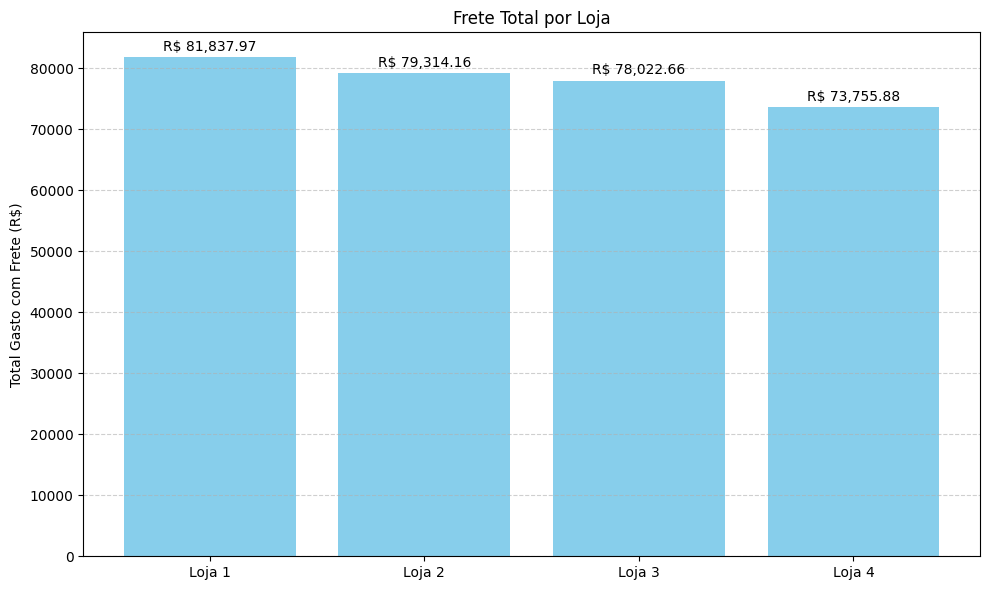

In [34]:
# Cálculo do frete total de cada loja
frete_total_loja1 = loja["Frete"].sum()
frete_total_loja2 = loja2["Frete"].sum()
frete_total_loja3 = loja3["Frete"].sum()
frete_total_loja4 = loja4["Frete"].sum()

# Listas para o gráfico
fretes_totais = [frete_total_loja1, frete_total_loja2, frete_total_loja3, frete_total_loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(nomes_lojas, fretes_totais, color='skyblue')

# Adicionando rótulos em cima das barras
for i, valor in enumerate(fretes_totais):
    plt.text(i, valor + 500, f"R$ {valor:,.2f}", ha='center', va='bottom')

# Título e rótulos
plt.title('Frete Total por Loja')
plt.ylabel('Total Gasto com Frete (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##Análise Descritiva

Ao analisar o custo com frete entre as quatro lojas da rede, observamos diferenças sutis, porém relevantes, tanto no valor médio quanto no valor total gasto com fretes.

No que diz respeito ao frete médio, a Loja 1 apresenta o maior valor, com R\$ 34,69 por pedido, seguida pela Loja 2 (R\$ 33,62), Loja 3 (R\$ 33,07) e, por fim, a Loja 4, com o menor frete médio: R$ 31,28. Essa diferença indica que, em média, os pedidos da Loja 1 demandam mais recursos logísticos, o que pode estar relacionado à localização dos clientes, tipo de produto vendido ou política de frete.

Já ao analisarmos o frete acumulado, ou seja, o total gasto com frete por loja, visualizamos um retrato mais amplo do impacto financeiro dessa variável. Lojas com maior volume de vendas, mesmo com frete médio mais baixo, podem ter um custo logístico total maior. Esse dado é fundamental para decisões estratégicas, especialmente quando consideramos eficiência operacional e margem de lucro.

Portanto, embora as diferenças de frete médio pareçam pequenas, seu impacto se torna mais evidente quando acumuladas ao longo do tempo. Essa informação deve ser considerada juntamente com os dados de faturamento, volume de vendas e tipo de produto, para compreender melhor o desempenho geral de cada unidade.

#Relatório
##Introdução
O presente relatório tem como objetivo identificar qual das quatro lojas analisadas deve ser descontinuada. A decisão é baseada em uma avaliação criteriosa de dados, considerando indicadores-chave como faturamento, avaliação média dos clientes, produtos mais e menos vendidos, categorias de vendas, custo médio de frete e análise ABC dos produtos. As análises visam orientar uma tomada de decisão fundamentada e estratégica para o Senhor João.

##Desenvolvimento
###Faturamento Total
A análise de faturamento demonstrou uma clara hierarquia entre as lojas, com a Loja 1 liderando em receita total, seguida pela Loja 2, Loja 3 e por fim a Loja 4, com o menor faturamento. A diferença entre a Loja 1 e a Loja 4 chega a aproximadamente R$ 150 mil, o que sinaliza uma disparidade relevante na performance financeira.

###Categorias Mais Vendidas
A composição das vendas por categoria foi bastante semelhante entre as lojas. A categoria “móveis” foi a mais vendida em todas, seguida por eletrônicos, brinquedos e eletrodomésticos. Essa consistência mostra que as preferências dos consumidores são parecidas nas quatro unidades, o que reforça que a performance não está ligada à variedade, mas sim à eficiência operacional.

###Avaliações dos Clientes
Em termos de satisfação dos clientes, as diferenças foram pequenas, mas ainda assim relevantes. A Loja 3 obteve a melhor média de avaliação (4.05), seguida da Loja 2 (4.04), Loja 4 (4.00) e Loja 1 (3.98). A Loja 1 apresenta a pior média, o que pode indicar problemas de experiência do cliente ou pós-venda, apesar do alto faturamento.

###Produtos Mais e Menos Vendidos
Os produtos mais vendidos variam entre micro-ondas, kits de banquetas, livros e cama box, refletindo a liderança das categorias mais procuradas. Já os menos vendidos são variados, o que reforça a necessidade de uma curadoria mais eficiente no catálogo de produtos.

###Frete Médio
A Loja 4 possui o menor frete médio (R\$ 31,28), enquanto a Loja 1 apresenta o maior (R$ 34,69). Essa diferença de custo pode impactar a margem de lucro, especialmente em produtos com baixo valor agregado. No entanto, esse fator por si só não é decisivo quando isolado.

###Curva ABC
Para finalizar nossa análise, apresentamos os dados da Curva ABC dos produtos de cada loja.
A Curva ABC é uma metodologia de categorização que classifica os produtos com base em sua importância para o faturamento total.

*   Os produtos da categoria A representam uma pequena parte do total de itens (20% dos produtos, 9-10 neste caso) vendidos, mas são os responsáveis pela maior parcela do faturamento total (80% da receita).
*   Já os da categoria B possuem importância intermediária (30% dos produtos, 15-16 neste caso), tanto em volume quanto em receita (15% da receita).
*  Por fim, os produtos da categoria C são numerosos (50% dos produtos, 25 neste caso), mas com baixa representatividade no faturamento (apenas 5% do faturamento).

Essa análise nos ajuda a identificar padrões de vendas e entender melhor quais produtos são mais estratégicos para o desempenho de cada loja. A partir desses dados, faremos uma recomendação fundamentada sobre o fechamento de uma das unidades.

In [27]:
def analise_abc(df):
    resumo = df.groupby('Produto').agg({
        'Preço': ['sum', 'count']
    }).reset_index()

    resumo.columns = ['Produto', 'Faturamento', 'Qtd. Vendas']
    resumo = resumo.sort_values(by='Faturamento', ascending=False).reset_index(drop=True)

    resumo['Faturamento (%)'] = resumo['Faturamento'] / resumo['Faturamento'].sum()
    resumo['Faturamento Acumulado (%)'] = resumo['Faturamento (%)'].cumsum()
    resumo['Posição Produto (%)'] = (resumo.index + 1) / len(resumo)

    def classificar(linha):
        if linha['Posição Produto (%)'] <= 0.2:
            return 'A'
        elif linha['Posição Produto (%)'] <= 0.5:
            return 'B'
        else:
            return 'C'

    resumo['Classe ABC'] = resumo.apply(classificar, axis=1)

    return resumo

def exibir_analise_abc(resumo, nome_loja):
    print(f" Análise ABC - {nome_loja}")
    print(resumo[['Produto', 'Faturamento', 'Qtd. Vendas', 'Classe ABC']])

# Executando a análise ABC para cada loja
abc_loja1 = analise_abc(loja)
abc_loja2 = analise_abc(loja2)
abc_loja3 = analise_abc(loja3)
abc_loja4 = analise_abc(loja4)

# Adicionando o nome da loja
abc_loja1['Loja'] = 'Loja 1'
abc_loja2['Loja'] = 'Loja 2'
abc_loja3['Loja'] = 'Loja 3'
abc_loja4['Loja'] = 'Loja 4'

# Exibindo a análise de cada loja no console
exibir_analise_abc(abc_loja1, 'Loja 1')
exibir_analise_abc(abc_loja2, 'Loja 2')
exibir_analise_abc(abc_loja3, 'Loja 3')
exibir_analise_abc(abc_loja4, 'Loja 4')




 Análise ABC - Loja 1
                        Produto  Faturamento  Qtd. Vendas Classe ABC
0                 TV Led UHD 4K    189534.28           60          A
1                     Geladeira    149524.28           54          A
2              Celular Plus X42    130536.40           49          A
3                      Smart TV     89936.15           44          A
4            Lavadora de roupas     87711.30           47          A
5                   Lava louças     82739.86           48          A
6            Secadora de roupas     78749.73           58          A
7                   Tablet ABXY     63520.11           42          A
8                       Bateria     50258.34           53          A
9                      Guitarra     49722.88           47          A
10                  Micro-ondas     46348.89           60          B
11                 Celular ABXY     43534.47           33          B
12                Sofá retrátil     41839.25           46          B
13          

###Análise da Curva ABC
A análise da Curva ABC revela que o portfólio de produtos responsáveis pela maior parte da receita das quatro lojas é bastante similar — especialmente na categoria A, que reúne os itens mais lucrativos. Nessa faixa, predominam produtos como eletrônicos e eletrodomésticos. Essa concentração de faturamento se tornará ainda mais evidente no gráfico de pizza a seguir, que mostra a composição da receita total combinada das lojas, segmentada por produto.

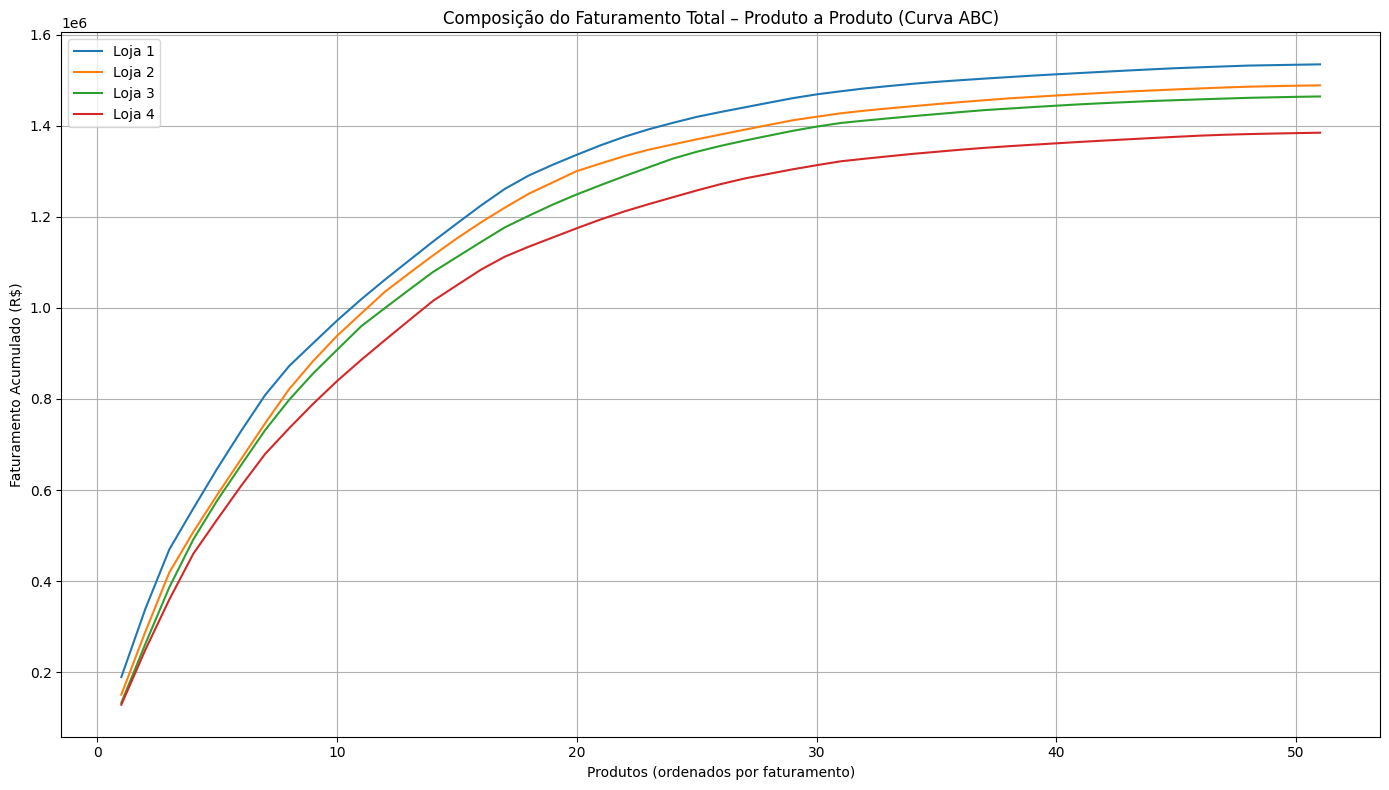

In [25]:
# Aplicar a função nas quatro lojas
abc_loja1 = analise_abc(loja)
abc_loja1['Loja'] = 'Loja 1'

abc_loja2 = analise_abc(loja2)
abc_loja2['Loja'] = 'Loja 2'

abc_loja3 = analise_abc(loja3)
abc_loja3['Loja'] = 'Loja 3'

abc_loja4 = analise_abc(loja4)
abc_loja4['Loja'] = 'Loja 4'

# Concatenar os resultados
df_abc_total = pd.concat([abc_loja1, abc_loja2, abc_loja3, abc_loja4])

# Adiciona coluna de faturamento acumulado absoluto
df_abc_total['Faturamento Acumulado'] = df_abc_total.groupby('Loja')['Faturamento'].cumsum()

# Plotar gráfico
plt.figure(figsize=(14, 8))

for nome_loja in df_abc_total['Loja'].unique():
    dados_loja = df_abc_total[df_abc_total['Loja'] == nome_loja].sort_values(by='Faturamento', ascending=False).reset_index(drop=True)
    x = range(1, len(dados_loja) + 1)
    y = dados_loja['Faturamento'].cumsum()
    plt.plot(x, y, label=str(nome_loja))

# Customizações
plt.title("Composição do Faturamento Total – Produto a Produto (Curva ABC)")
plt.xlabel("Produtos (ordenados por faturamento)")
plt.ylabel("Faturamento Acumulado (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

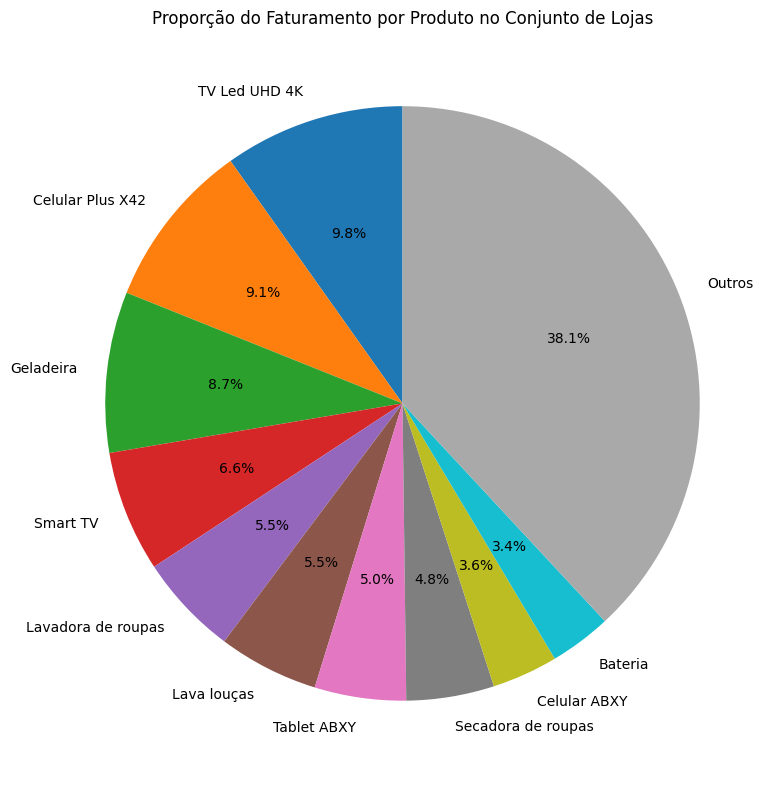

In [23]:
# Agrupar todas as lojas
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

# Faturamento por produto
faturamento_produto = todas_lojas.groupby("Produto")["Preço"].sum().sort_values(ascending=False)

# Agrupar os produtos menores como "Outros"
top_n = 10
top_produtos = faturamento_produto[:top_n]
outros = faturamento_produto[top_n:].sum()
top_produtos["Outros"] = outros

# Cores personalizadas
cores = plt.cm.tab10.colors
cores_lista = list(cores) + ['#A9A9A9']

# Gráfico de pizza
plt.figure(figsize=(8, 8))
top_produtos.plot.pie(autopct='%1.1f%%', startangle=90, colors=cores_lista)
plt.title("Proporção do Faturamento por Produto no Conjunto de Lojas")
plt.ylabel('')
plt.tight_layout()
plt.show()


##Conclusão
Considerando o faturamento, as vendas por categoria e os produtos mais e menos vendidos em cada loja, **concluímos que a Loja 4 deve ser encerrada.**

Em uma análise inicial, havia indícios de que a loja poderia ser lucrativa, devido ao seu baixo custo de frete, boa avaliação no atendimento e uma possível variedade diferenciada de produtos. No entanto, ao analisarmos a receita bruta por meio da Curva ABC, percebemos que o portfólio da Loja 4 é bastante semelhante ao das demais — o que muda é o rendimento, significativamente inferior.

Dessa forma, acreditamos que o fechamento da Loja 4 é a decisão mais estratégica.

##Análise de Desempenho Geográfico

Por fim, realizamos uma análise do desempenho geográfico de cada loja. Inicialmente, exploramos o comportamento estatístico das vendas por localização, a fim de visualizar a presença de caudas e outliers. Em seguida, construímos mapas de distribuição geográfica individual para cada loja, com base nas coordenadas de latitude e longitude.



📊 Estatísticas por loja:
        count       mean         std  min    25%   50%   75%    max
Loja                                                               
Loja 1   26.0  90.730769  197.934041  1.0  10.25  22.0  69.5  984.0
Loja 2   26.0  90.730769  198.832102  1.0   7.50  19.5  76.0  985.0
Loja 3   27.0  87.370370  194.747005  1.0   6.50  22.0  67.0  983.0
Loja 4   25.0  94.320000  202.585932  3.0  14.00  27.0  80.0  991.0


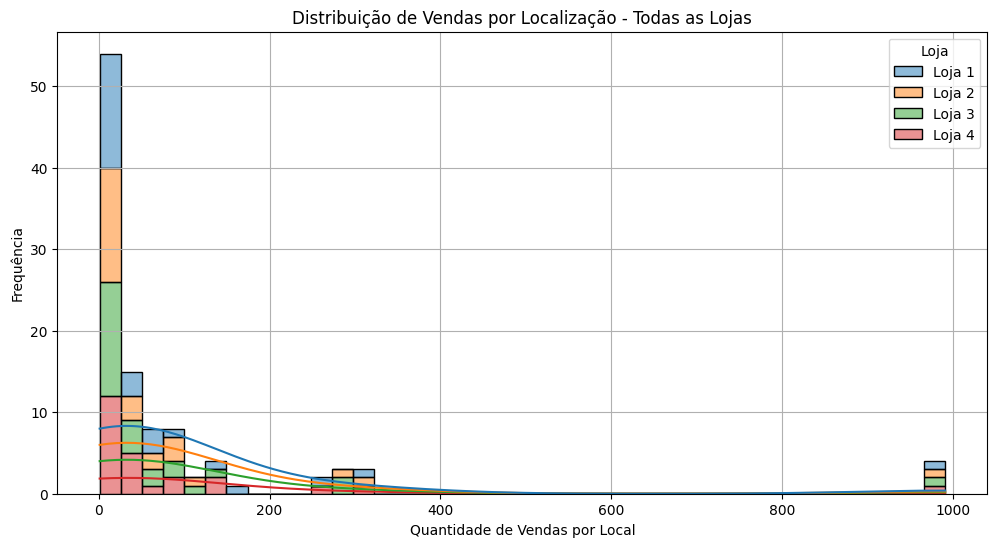

In [21]:
# Agrupar por lat/lon e Loja para contar as vendas por local
df_loja1 = loja.groupby(['lat', 'lon']).size().reset_index(name='Vendas')
df_loja1['Loja'] = 'Loja 1'

df_loja2 = loja2.groupby(['lat', 'lon']).size().reset_index(name='Vendas')
df_loja2['Loja'] = 'Loja 2'

df_loja3 = loja3.groupby(['lat', 'lon']).size().reset_index(name='Vendas')
df_loja3['Loja'] = 'Loja 3'

df_loja4 = loja4.groupby(['lat', 'lon']).size().reset_index(name='Vendas')
df_loja4['Loja'] = 'Loja 4'

# Unir tudo em um único DataFrame
df_vendas_locais = pd.concat([df_loja1, df_loja2, df_loja3, df_loja4], ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas descritivas por loja
print("📊 Estatísticas por loja:")
print(df_vendas_locais.groupby('Loja')['Vendas'].describe())

# Histograma para visualizar a distribuição das vendas por local
plt.figure(figsize=(12, 6))
sns.histplot(data=df_vendas_locais, x='Vendas', hue='Loja', bins=40, kde=True, multiple='stack')
plt.title('Distribuição de Vendas por Localização - Todas as Lojas')
plt.xlabel('Quantidade de Vendas por Local')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


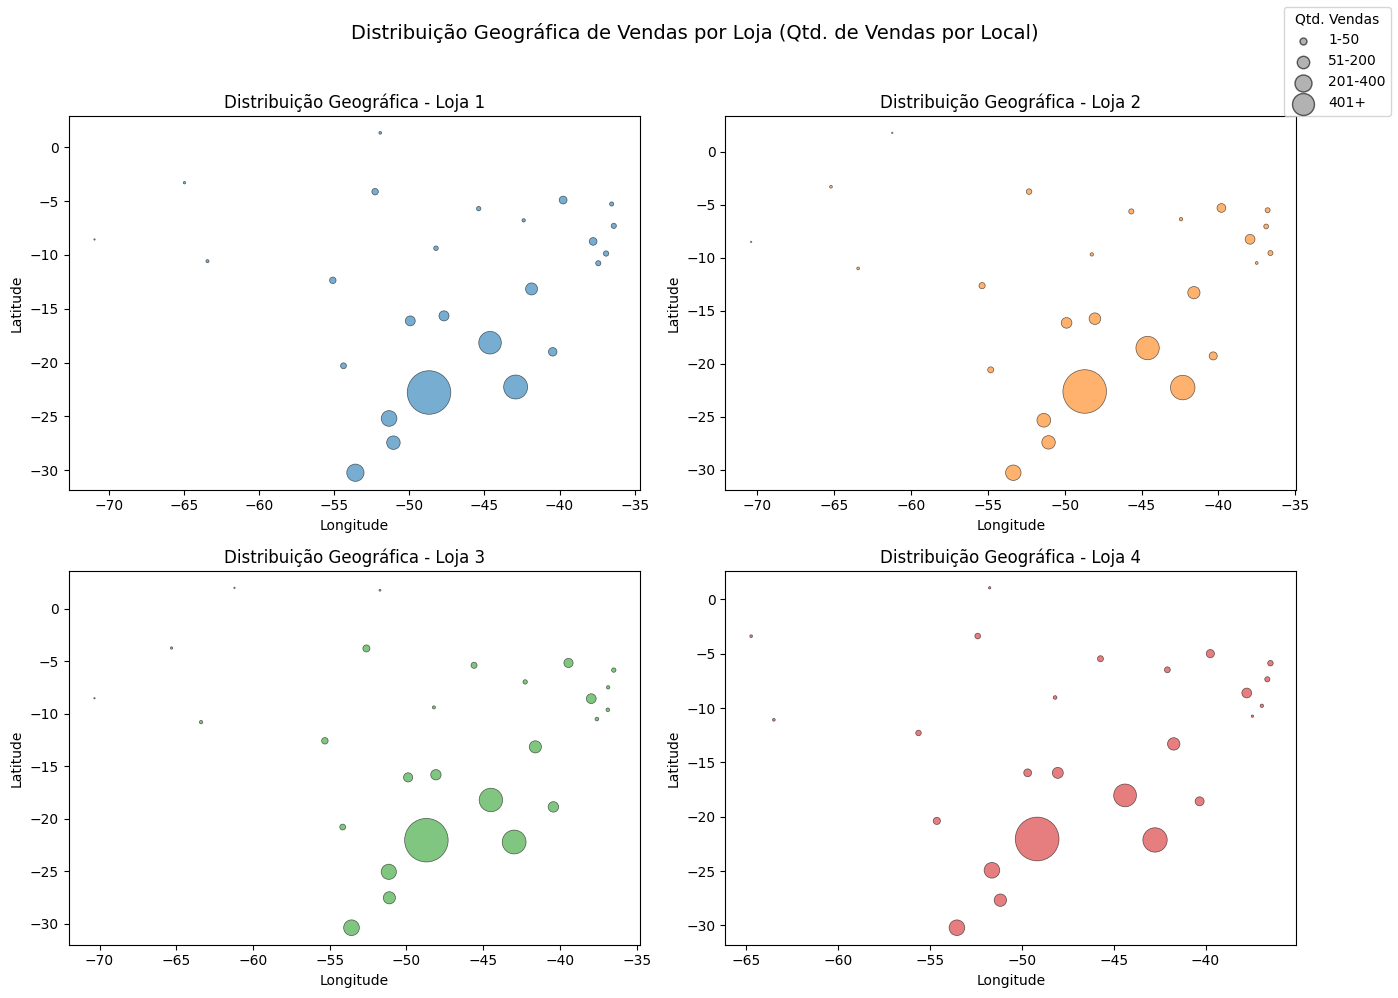

In [19]:
# 1. Unir os dados das quatro lojas com a coluna de identificação
loja1_geo = loja[['lat', 'lon']].copy()
loja1_geo['Loja'] = 'Loja 1'

loja2_geo = loja2[['lat', 'lon']].copy()
loja2_geo['Loja'] = 'Loja 2'

loja3_geo = loja3[['lat', 'lon']].copy()
loja3_geo['Loja'] = 'Loja 3'

loja4_geo = loja4[['lat', 'lon']].copy()
loja4_geo['Loja'] = 'Loja 4'

# Concatenar
df_geo = pd.concat([loja1_geo, loja2_geo, loja3_geo, loja4_geo], ignore_index=True)

# 2. Agrupar por localização e loja e contar vendas
df_grouped = df_geo.groupby(['lat', 'lon', 'Loja']).size().reset_index(name='Qtd. Vendas')

# 3. Adicionar jitter para evitar sobreposição
df_grouped['lat_jitter'] = df_grouped['lat'] + np.random.normal(0, 0.2, size=len(df_grouped))
df_grouped['lon_jitter'] = df_grouped['lon'] + np.random.normal(0, 0.2, size=len(df_grouped))

# 4. Criar categorias de vendas para a legenda
bins = [0, 50, 200, 400, 6000]
labels = ['1-50', '51-200', '201-400', '401+']
df_grouped['Categoria Vendas'] = pd.cut(df_grouped['Qtd. Vendas'], bins=bins, labels=labels)

# 5. Plotar os gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for ax, loja_nome, cor in zip(axes.flatten(), lojas, cores):
    dados_loja = df_grouped[df_grouped['Loja'] == loja_nome]

    scatter = ax.scatter(
        dados_loja['lon_jitter'], dados_loja['lat_jitter'],
        s=dados_loja['Qtd. Vendas'],  # Tamanho do ponto pela quantidade
        c=cor, alpha=0.6, edgecolor='black', linewidth=0.5
    )

    # Adiciona título e eixos
    ax.set_title(f'Distribuição Geográfica - {loja_nome}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Criar legenda personalizada com tamanhos representando faixas
import matplotlib.lines as mlines

legend_sizes = [25, 80, 150, 250]
legend_labels = ['1-50', '51-200', '201-400', '401+']
legend_elements = [
    plt.scatter([], [], s=size, color='gray', alpha=0.6, edgecolors='black', label=label)
    for size, label in zip(legend_sizes, legend_labels)
]

fig.legend(handles=legend_elements, title='Qtd. Vendas', loc='upper right')
plt.suptitle('Distribuição Geográfica de Vendas por Loja (Qtd. de Vendas por Local)', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.95, 0.96])
plt.show()